In [2]:

import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\BJNPRS\AppData\Local\Temp\ipykernel_13008\2623279992.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv("dreaddit-train.csv")

In [4]:
df["subreddit"].nunique

<bound method IndexOpsMixin.nunique of 0                   ptsd
1             assistance
2                   ptsd
3          relationships
4       survivorsofabuse
              ...       
2833       relationships
2834                ptsd
2835             anxiety
2836      almosthomeless
2837                ptsd
Name: subreddit, Length: 2838, dtype: object>

In [5]:
df.columns


Index(['subreddit', 'post_id', 'sentence_range', 'text', 'id', 'label',
       'confidence', 'social_timestamp', 'social_karma', 'syntax_ari',
       ...
       'lex_dal_min_pleasantness', 'lex_dal_min_activation',
       'lex_dal_min_imagery', 'lex_dal_avg_activation', 'lex_dal_avg_imagery',
       'lex_dal_avg_pleasantness', 'social_upvote_ratio',
       'social_num_comments', 'syntax_fk_grade', 'sentiment'],
      dtype='object', length=116)

In [7]:
df=df[['text','label']]

In [7]:
df['text'][2]

'My mom then hit me with the newspaper and it shocked me that she would do this, she knows I don\'t like play hitting, smacking, striking, hitting or violence of any sort on my person. Do I send out this vibe asking for it from the universe? Then yesterday I decided to take my friend to go help another "friend" move to a new place. While we were driving the friend we are moving strikes me on my shoulder. And I address it immediately because this is the 4th time I have told him not to do these things, then my other friend who is driving nearly gets into an collision with another car i think because he was high on marijuana and the friend we are moving in the backseat is like "you have to understand I was just trying to get your attention" you know the thing 5 year olds do to get peoples attention by smacking them, this guy is in his 60\'s.'

In [6]:
df

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.800000,1521614353,5,1.806818,...,1.0000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.000000,1527009817,4,9.429737,...,1.1250,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.800000,1535935605,2,7.769821,...,1.0000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.600000,1516429555,0,2.667798,...,1.0000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.800000,1539809005,24,7.554238,...,1.0000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2833,relationships,7oee1t,"[35, 40]","* Her, a week ago: Precious, how are you? (I i...",1713,0,1.000000,1515187044,13,-1.369333,...,1.4000,1.0000,1.0,1.71133,1.45301,2.00304,0.84,16,0.254444,0.552066
2834,ptsd,9p4ung,"[20, 25]",I don't have the ability to cope with it anymo...,1133,1,1.000000,1539827412,33,9.425478,...,1.0000,1.0000,1.0,1.65003,1.56842,1.81527,0.96,6,8.640664,-0.220370
2835,anxiety,9nam6l,"(5, 10)",In case this is the first time you're reading ...,10442,0,1.000000,1539269312,2,11.060675,...,1.1250,1.1250,1.0,1.79768,1.49074,1.92286,1.00,1,9.951524,0.045455
2836,almosthomeless,5y53ya,"[5, 10]",Do you find this normal? They have a good rela...,1834,0,0.571429,1488938143,4,2.421912,...,1.1111,1.1429,1.0,1.71642,1.57627,1.89972,0.75,7,4.036765,0.159722


In [9]:
import nltk
import string
import re
from nltk.corpus import stopwords

stop_words_list = stopwords.words("english")

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"\n", " ", text)
    text = re.sub(r"\d", " ", text)
    text = re.sub(r"<.*?>+", "", text)
    text = re.sub(r"\[.*?\]", "", text)
    text = re.sub(r"https?://S+|www.\.\S+", "", text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    words = text.split()
    words = [word for word in words if not word in stop_words_list]
    words = [re.sub(r"(.)\1{1,}", r"\1\1", word) for word in words]
    words = [word.strip() for word in words if len(word.strip()) > 1]
    text = " ".join(words)
    return text

In [10]:
df['text']=df['text'].apply(preprocess_text)

In [11]:
from nltk import SnowballStemmer

stemmer = SnowballStemmer("english")

def stemming(text):
    stemmed_text = ""
    for word in text.split():
        stem = stemmer.stem(word)
        stemmed_text += stem
        stemmed_text += " "
        
    stemmed_text = stemmed_text.strip()
    return stemmed_text

In [12]:
df['text']=df['text'].apply(stemming)

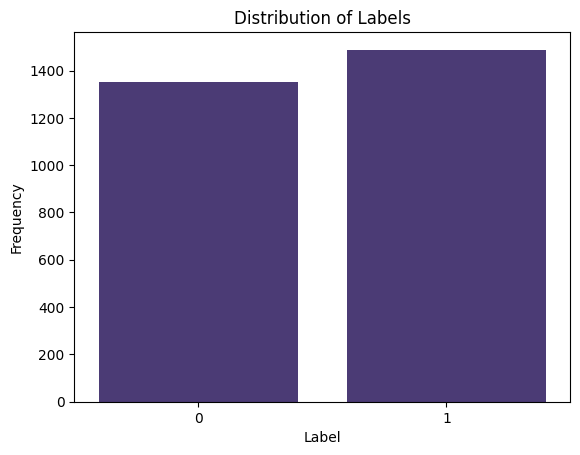

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a color palette for the plot
sns.set_palette('viridis')

# Plot histogram of labels using Seaborn
sns.countplot(data=df, x='label')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Distribution of Labels')
plt.show()



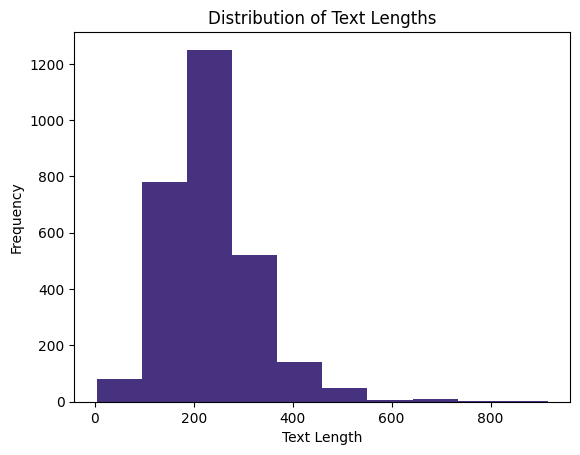

In [13]:
# Calculate text lengths
df['text_length'] = df['text'].apply(len)

# Plot histogram of text lengths
plt.hist(df['text_length'])
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths')
plt.show()


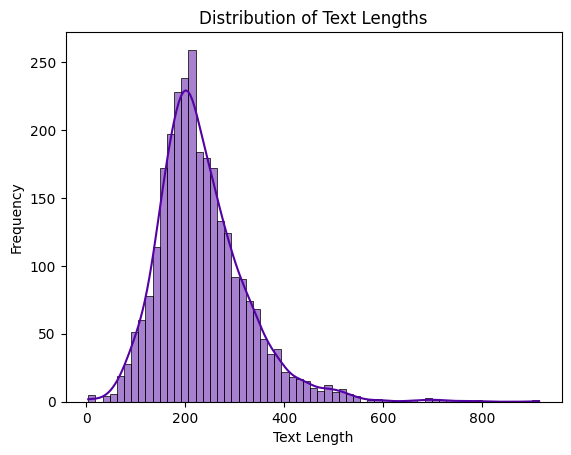

In [14]:
import seaborn as sns

# Set a custom color palette
sns.set_palette("plasma")

# Plot histogram of text lengths using Seaborn
sns.histplot(data=df, x='text_length', kde=True)
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths')
plt.show()


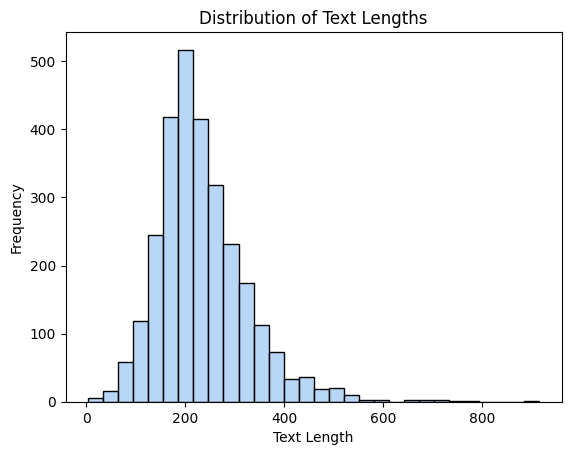

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a Seaborn color palette for an attractive plot
sns.set_palette("pastel")

# Plot histogram of text lengths using Seaborn
sns.histplot(data=df, x='text_length', kde=False, bins=30)  # You can adjust the number of bins as needed
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths')
plt.show()


C:\Users\BJNPRS\AppData\Local\Temp\ipykernel_2676\1928519228.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette='pastel')


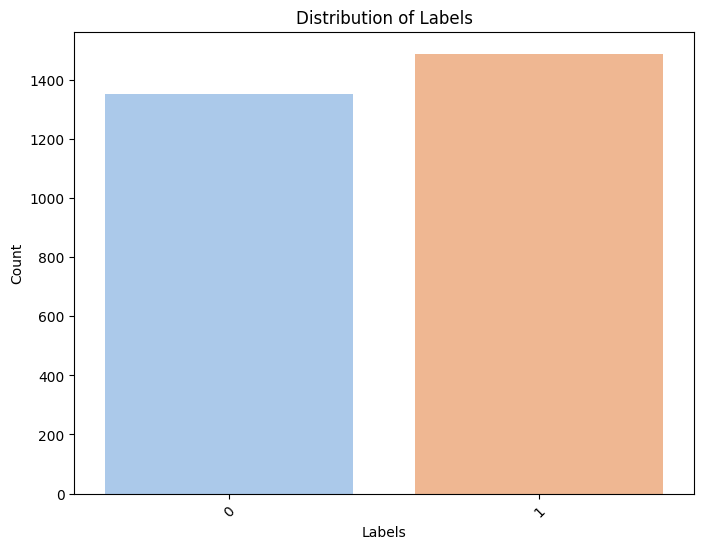

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting distribution of labels
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='label', palette='pastel')
plt.title('Distribution of Labels')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [17]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


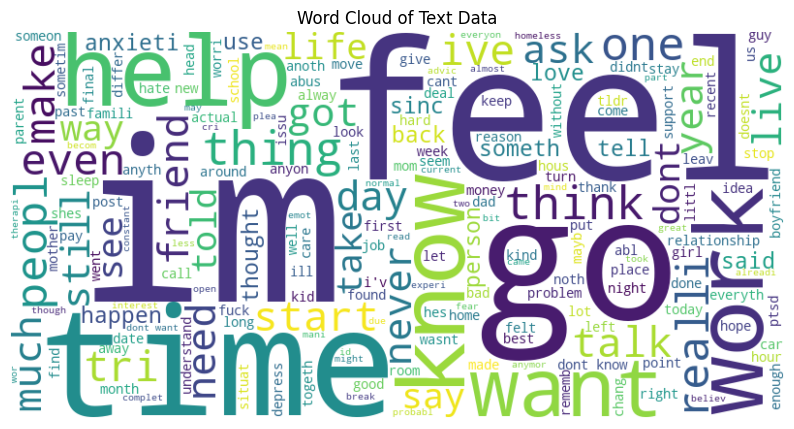

In [44]:

from wordcloud import WordCloud

# Combining text data into a single string
text = ' '.join(df['text'])

# Generating word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plotting word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Text Data')
plt.axis('off')
plt.show()


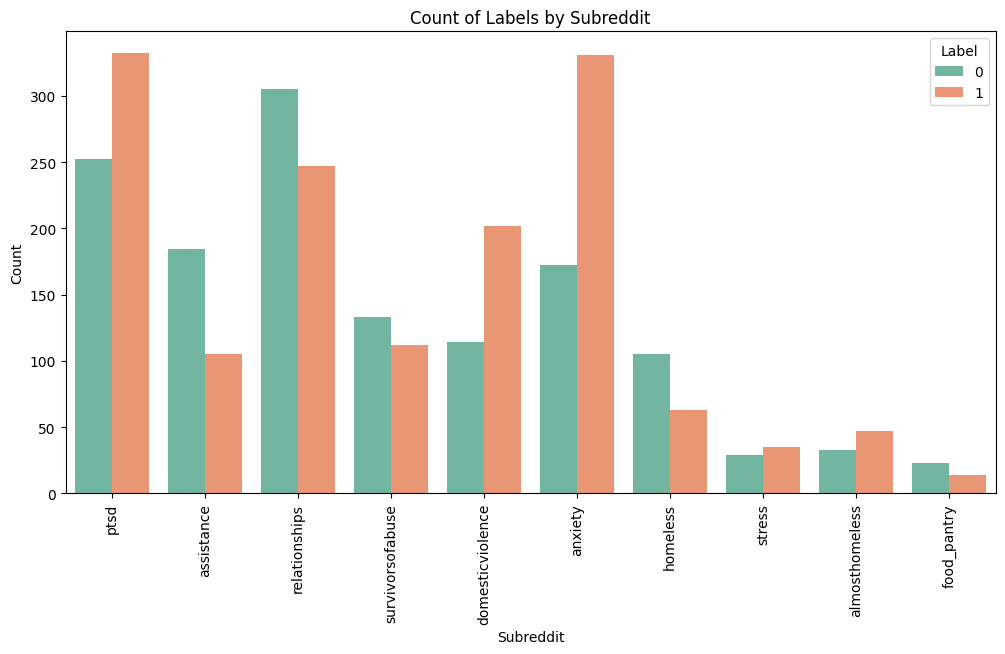

In [39]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='subreddit', hue='label', palette='Set2')
plt.title('Count of Labels by Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Label')
plt.show()


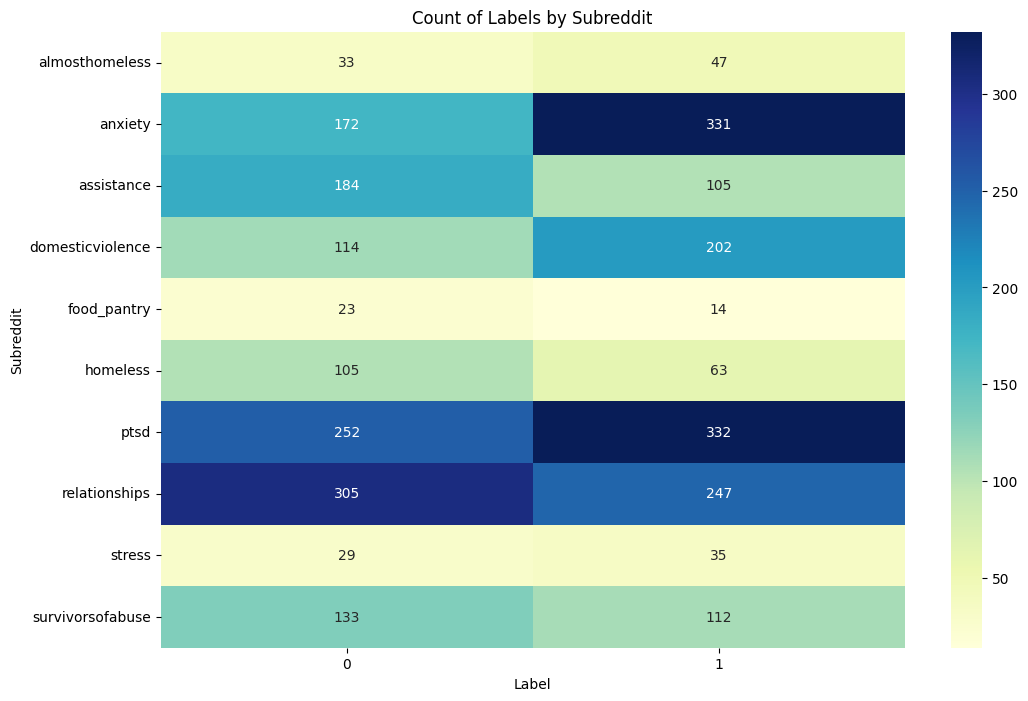

In [48]:
# Create a pivot table to calculate counts
pivot_table = df.pivot_table(index='subreddit', columns='label', aggfunc='size', fill_value=0)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Count of Labels by Subreddit')
plt.xlabel('Label')
plt.ylabel('Subreddit')
plt.show()


<Figure size 1200x600 with 0 Axes>

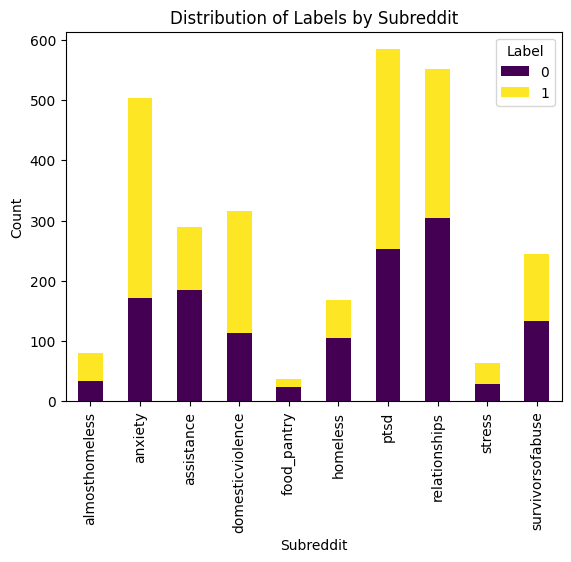

In [41]:
# Create a cross-tabulation of subreddit and label
cross_tab = pd.crosstab(df['subreddit'], df['label'])

# Plot stacked bar plot
plt.figure(figsize=(12, 6))
cross_tab.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Distribution of Labels by Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Label')
plt.show()


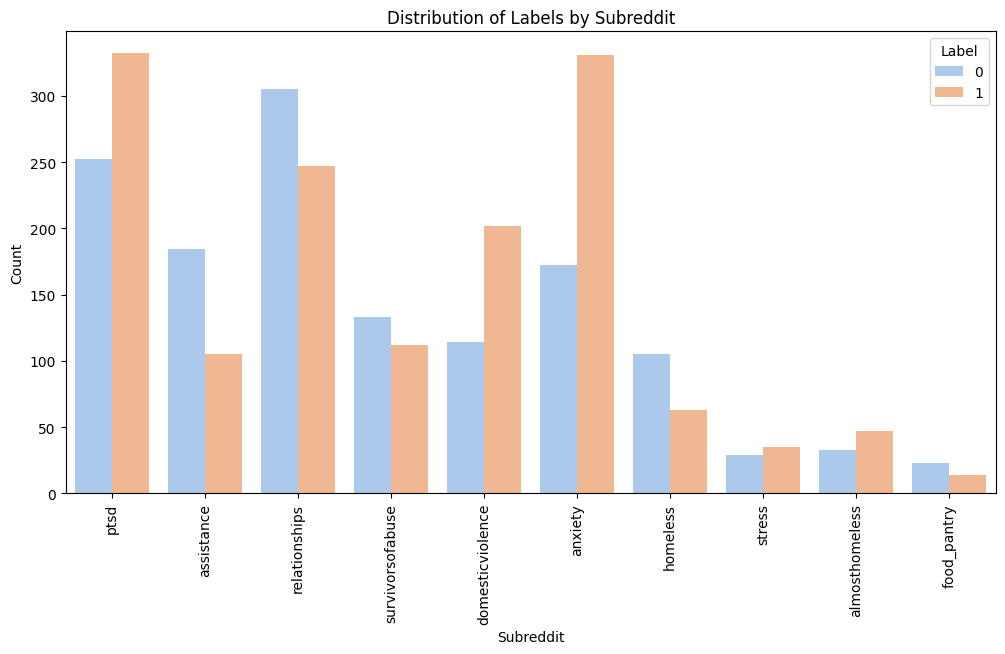

In [42]:
# Plot clustered bar plot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='subreddit', hue='label', palette='pastel')
plt.title('Distribution of Labels by Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Label')
plt.show()


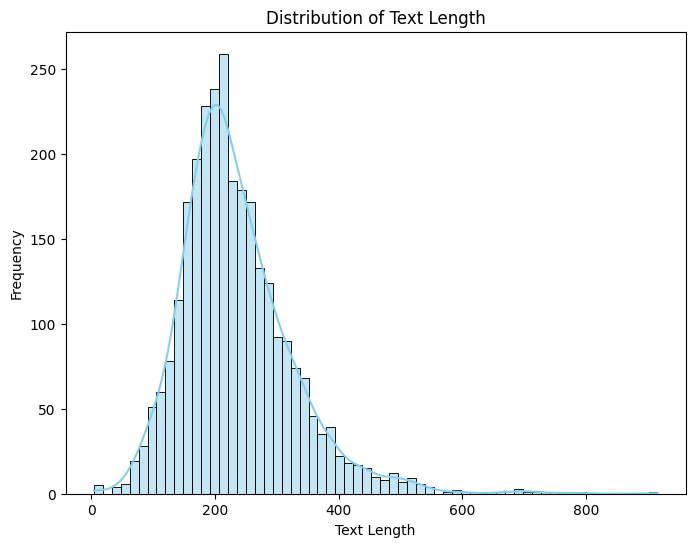

In [45]:
# Calculating text length
df['text_length'] = df['text'].apply(len)

# Plotting distribution of text length
plt.figure(figsize=(8, 6))
sns.histplot(df['text_length'], kde=True, color='skyblue')
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


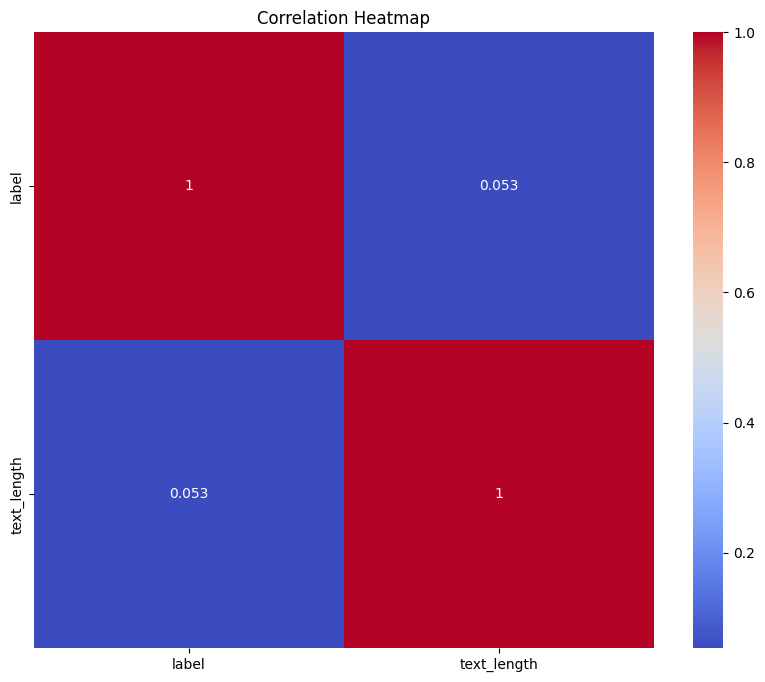

In [46]:
# Selecting numerical columns for correlation heatmap
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculating correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Plotting correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


C:\Users\BJNPRS\AppData\Local\Temp\ipykernel_6492\2012304137.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='label', y='text_length', palette='Pastel1')


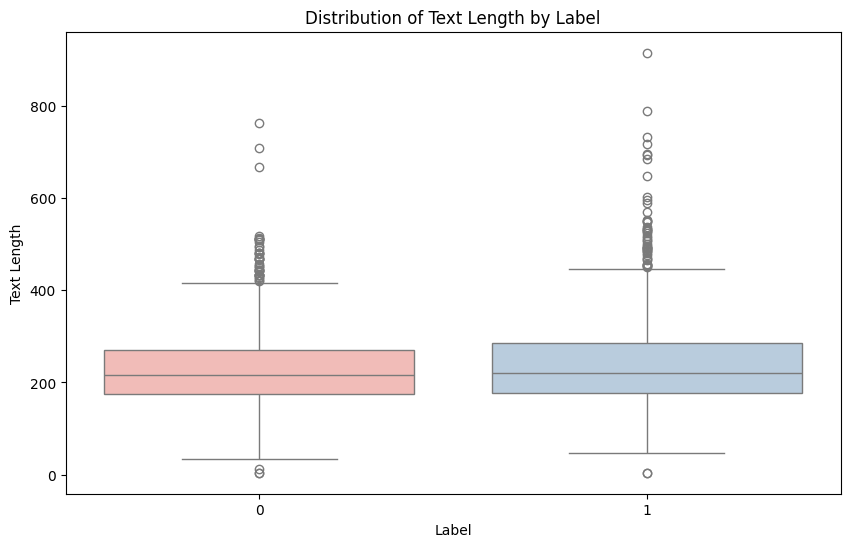

In [47]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='label', y='text_length', palette='Pastel1')
plt.title('Distribution of Text Length by Label')
plt.xlabel('Label')
plt.ylabel('Text Length')
plt.show()


c:\Users\BJNPRS\.conda\envs\myenv\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\BJNPRS\.conda\envs\myenv\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\BJNPRS\.conda\envs\myenv\lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
c:\Users\BJNPRS\.conda\envs\myenv\lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)


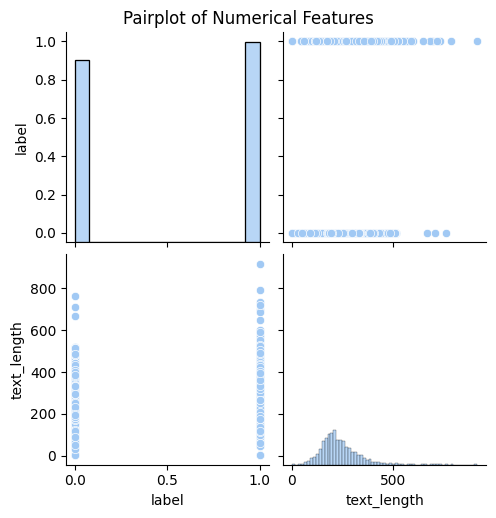

In [48]:
sns.pairplot(df[numerical_columns], palette='viridis')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()


C:\Users\BJNPRS\AppData\Local\Temp\ipykernel_2676\3671573612.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='subreddit', y='social_karma', palette='plasma')


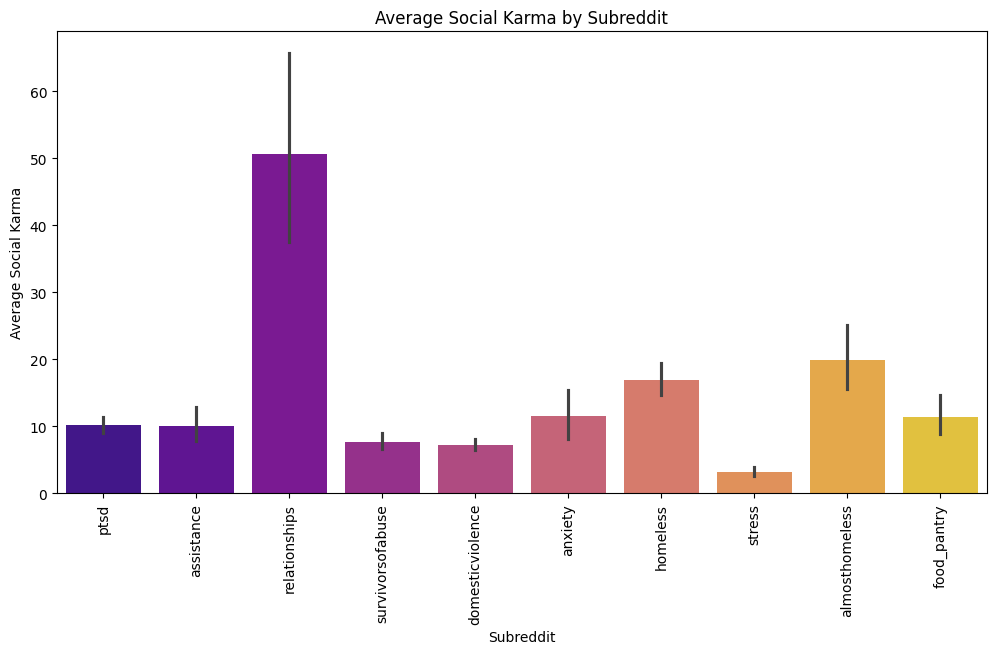

In [30]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='subreddit', y='social_karma', palette='plasma')
plt.title('Average Social Karma by Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Average Social Karma')
plt.xticks(rotation=90)
plt.show()


In [86]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='categorical_feature', palette='Set3')
plt.title('Count of Categorical Feature')
plt.xlabel('Categorical Feature')
plt.ylabel('Count')
plt.show()


ValueError: Could not interpret value `categorical_feature` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

C:\Users\BJNPRS\AppData\Local\Temp\ipykernel_6492\1535722686.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='subreddit', y='social_karma', palette='Set2')


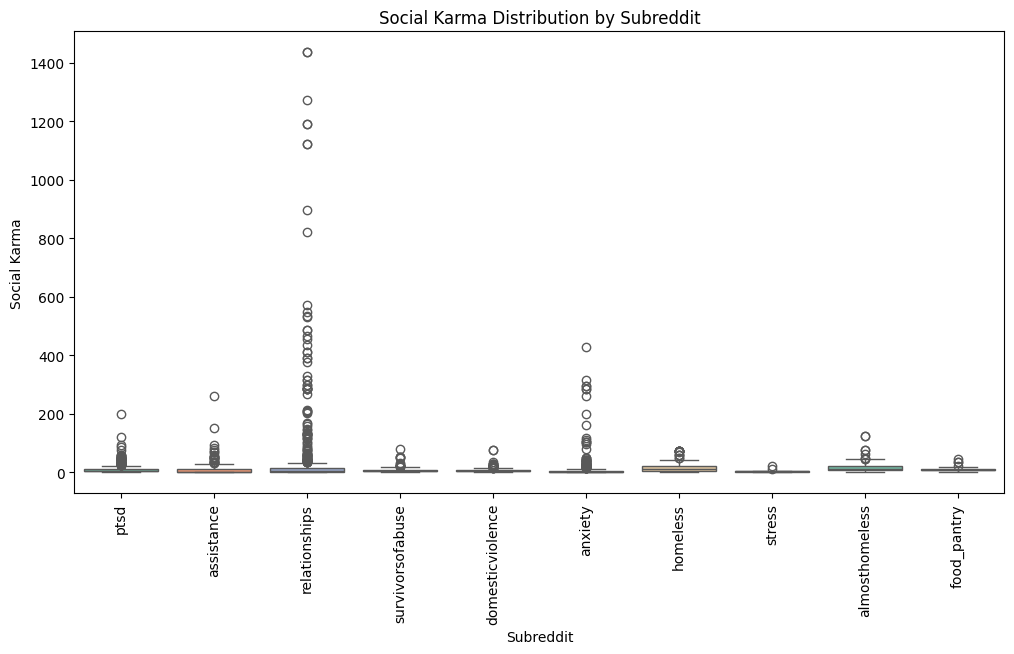

In [57]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='subreddit', y='social_karma', palette='Set2')
plt.title('Social Karma Distribution by Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Social Karma')
plt.xticks(rotation=90)
plt.show()


In [13]:
X = df["text"]
y = df["label"]

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_scaled = tfidf.fit_transform(X)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)

In [15]:
# Importing necessary libraries
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Create a k-NN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5481220657276995


In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [68]:
# Create a Logistic Regression classifier
log_reg = LogisticRegression()

In [55]:
# Train the model
log_reg.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = log_reg.predict(X_test)

In [58]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7382629107981221


In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.70      0.72       416
           1       0.73      0.78      0.75       436

    accuracy                           0.74       852
   macro avg       0.74      0.74      0.74       852
weighted avg       0.74      0.74      0.74       852



In [67]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2']  # Penalty term ('l1' for Lasso, 'l2' for Ridge)
}


In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Initialize logistic regression model
logreg = LogisticRegression(max_iter=1000)


# Initialize grid search with 5-fold cross-validation
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')

# Perform grid search on training data
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Best cross-validation score
print("Best cross-validation score:", grid_search.best_score_)


Best hyperparameters: {'C': 1, 'penalty': 'l2'}
Best cross-validation score: 0.7603293545814716


c:\Users\BJNPRS\.conda\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\BJNPRS\.conda\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\BJNPRS\.conda\envs\myenv\lib\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\BJNPRS\.conda\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver = _check_solver(s

In [62]:
y_Pred = log_reg.predict(X_train)

In [64]:
print(classification_report(y_train,y_Pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       934
           1       0.88      0.92      0.90      1052

    accuracy                           0.89      1986
   macro avg       0.89      0.89      0.89      1986
weighted avg       0.89      0.89      0.89      1986



In [66]:
accuracy = accuracy_score(y_train, y_Pred)
print(accuracy)

0.8927492447129909


In [73]:
from sklearn.naive_bayes import GaussianNB

In [74]:
nb = GaussianNB()

In [75]:
X_train=X_train.toarray()
X_test=X_test.toarray()

In [76]:
# Train the model
nb.fit(X_train, y_train)

GaussianNB()

In [84]:
# Make predictions on the testing set
y_pred = nb.predict(X_test)

In [82]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5974178403755869


In [79]:
from sklearn.naive_bayes import MultinomialNB
multinomial_nb = MultinomialNB()

In [83]:
multinomial_nb.fit(X_train, y_train)

MultinomialNB()

In [85]:
y_pred = multinomial_nb.predict(X_test)

In [86]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6431924882629108


In [87]:
y_Pred = multinomial_nb.predict(X_train)

In [88]:
accuracy = accuracy_score(y_train, y_Pred)
print("Accuracy:", accuracy)

Accuracy: 0.8066465256797583


In [89]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.31      0.46       416
           1       0.59      0.96      0.73       436

    accuracy                           0.64       852
   macro avg       0.74      0.64      0.60       852
weighted avg       0.74      0.64      0.60       852



In [92]:
param_grid = {
    'alpha': [0.1, 0.5, 1.0],  # Smoothing parameter
    'fit_prior': [True, False]  # Whether to learn class prior probabilities
}

# Initialize grid search with 5-fold cross-validation
grid_search = GridSearchCV(multinomial_nb, param_grid, cv=5, scoring='accuracy')

# Perform grid search on training data
grid_search.fit(X_train, y_train)

# Print best hyperparameters and cross-validation score
print("Best hyperparameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate best model on test data
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test accuracy:", test_accuracy)

Best hyperparameters: {'alpha': 0.1, 'fit_prior': False}
Best cross-validation score: 0.7326354695391314
Test accuracy: 0.7112676056338029


In [21]:
# Importing necessary libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [17]:
# Create an SVM classifier with a linear kernel
svm = SVC(kernel='linear')

In [18]:
# Train the model
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [19]:
# Make predictions on the testing set
y_pred = svm.predict(X_test)

In [22]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7265258215962441


In [23]:
y_Pred = svm.predict(X_train)

In [24]:
accuracy = accuracy_score(y_train, y_Pred)
print("Accuracy:", accuracy)


Accuracy: 0.9446122860020141


In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74       403
           1       0.78      0.72      0.75       449

    accuracy                           0.75       852
   macro avg       0.75      0.75      0.75       852
weighted avg       0.75      0.75      0.75       852



In [25]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV, train_test_split
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear', 'poly']}
svm = SVC()
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

In [26]:
# Train the SVM model with the best hyperparameters
best_svm = SVC(**best_params)
best_svm.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = best_svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7453051643192489


In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}

# Initialize the SVM classifier
svm = SVC()

# Initialize GridSearchCV
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Use the best model to predict on the test data
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)


In [28]:
print(best_model)
print(test_accuracy)

SVC(C=1, gamma=1)
0.7453051643192489


In [ ]:
from sklearn.naive_bayes import BernoulliNB

nb = BernoulliNB()
nb.fit(X_train, y_train)

import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import nltk
import string
import re
from nltk.corpus import stopwords
from nltk import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import pickle

In [42]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score



# 2. Initialize and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # Initialize with k=5
knn.fit(X_train, y_train)

# 3. Make predictions on the testing set
y_pred = knn.predict(X_test)

# 4. Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.6678403755868545
              precision    recall  f1-score   support

           0       0.69      0.55      0.61       403
           1       0.66      0.77      0.71       449

    accuracy                           0.67       852
   macro avg       0.67      0.66      0.66       852
weighted avg       0.67      0.67      0.66       852



In [43]:

y_pred = knn.predict(X_train)

In [44]:
accuracy = accuracy_score(y_train, y_pred)
print(accuracy)

0.7814702920443102


In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11]  # Define the range of values for n_neighbors
}

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Perform grid search on training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Use the best model to predict on the test data
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)

print("Best hyperparameters:", best_params)
print("Best cross-validation score:", best_score)
print("Test accuracy:", test_accuracy)


Best hyperparameters: {'n_neighbors': 11}
Best cross-validation score: 0.6797564649443693
Test accuracy: 0.6619718309859155


In [57]:
print(classification_report(y_train, y_Pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       947
           1       1.00      1.00      1.00      1039

    accuracy                           1.00      1986
   macro avg       1.00      1.00      1.00      1986
weighted avg       1.00      1.00      1.00      1986



In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report




In [48]:
# Initialize the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)



In [49]:
# Fit the classifier to the training data
decision_tree.fit(X_train, y_train)



DecisionTreeClassifier(random_state=42)

In [50]:
# Make predictions on the testing data
y_pred = decision_tree.predict(X_test)



In [51]:
# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.5786384976525821
              precision    recall  f1-score   support

           0       0.55      0.58      0.56       403
           1       0.60      0.58      0.59       449

    accuracy                           0.58       852
   macro avg       0.58      0.58      0.58       852
weighted avg       0.58      0.58      0.58       852



In [52]:
y_Pred = decision_tree.predict(X_train)

In [55]:
accuracy = accuracy_score(y_train, y_Pred)
print("Accuracy:", accuracy)

Accuracy: 0.999496475327291


In [56]:
print(classification_report(y_train, y_Pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       947
           1       1.00      1.00      1.00      1039

    accuracy                           1.00      1986
   macro avg       1.00      1.00      1.00      1986
weighted avg       1.00      1.00      1.00      1986



In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score




In [59]:
# Initialize the Decision Tree Classifier with limited depth
decision_tree = DecisionTreeClassifier(max_depth=5, random_state=42)

# Perform cross-validation to evaluate model performance
cv_scores = cross_val_score(decision_tree, X_train, y_train, cv=5)


In [60]:

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())



Cross-Validation Scores: [0.6080402  0.63224181 0.65239295 0.62216625 0.61460957]
Mean Cross-Validation Score: 0.6258901560700226


In [61]:
# Fit the model to the entire training data
decision_tree.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=5, random_state=42)

In [62]:
# Evaluate model performance on testing data
test_accuracy = decision_tree.score(X_test, y_test)
print("Testing Data Accuracy:", test_accuracy)

Testing Data Accuracy: 0.6232394366197183


In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report




In [66]:
# Initialize the Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)



In [67]:
# Fit the classifier to the training data
random_forest.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [68]:

y_pred = random_forest.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.7417840375586855
              precision    recall  f1-score   support

           0       0.75      0.69      0.72       403
           1       0.74      0.79      0.76       449

    accuracy                           0.74       852
   macro avg       0.74      0.74      0.74       852
weighted avg       0.74      0.74      0.74       852



In [69]:
y_Pred = random_forest.predict(X_train)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_train, y_Pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_train, y_Pred))

Accuracy: 0.999496475327291
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       947
           1       1.00      1.00      1.00      1039

    accuracy                           1.00      1986
   macro avg       1.00      1.00      1.00      1986
weighted avg       1.00      1.00      1.00      1986



In [70]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)

# Perform grid search
grid_search.fit(X_train, y_train)


# Get the best parameters
best_params = grid_search.best_params_

# Fit the model with the best parameters
best_model = RandomForestClassifier(**best_params, random_state=42)
best_model.fit(X_train, y_train)

# Evaluate the model
accuracy = best_model.score(X_test, y_test)
print("Accuracy after hyperparameter tuning:", accuracy)


Accuracy after hyperparameter tuning: 0.7429577464788732


C:\Users\BJNPRS\AppData\Local\Temp\ipykernel_14904\2327686115.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_test_accuracies, x="Model", y="Test Accuracy", palette="inferno")


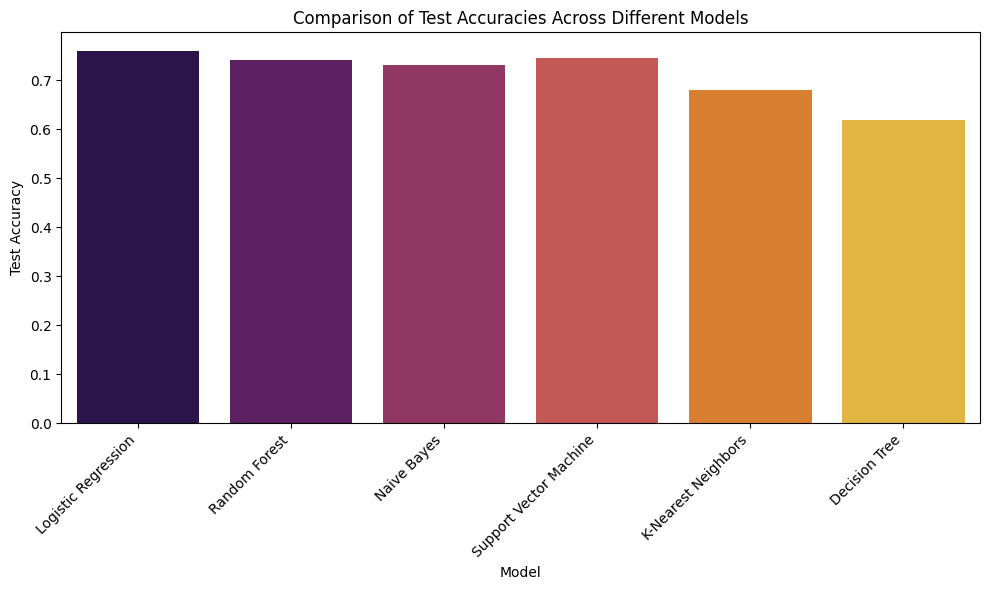

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Test accuracies of different models
model_test_accuracies = {
    "Logistic Regression": 0.76,
    "Random Forest": 0.7417,
    "Naive Bayes": 0.732,
    "Support Vector Machine": 0.7453,
    "K-Nearest Neighbors": 0.68,
    "Decision Tree": 0.62
}

# Create a DataFrame from the dictionary
df_test_accuracies = pd.DataFrame(model_test_accuracies.items(), columns=["Model", "Test Accuracy"])

# Plotting the comparison using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=df_test_accuracies, x="Model", y="Test Accuracy", palette="inferno")
plt.title("Comparison of Test Accuracies Across Different Models")
plt.xlabel("Model")
plt.ylabel("Test Accuracy")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
